In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt 
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

In [2]:
df = pd.read_csv(r'data.csv' , names=['x', 'y'],skiprows=1)
print(df)

      x   y
0    54   1
1    56   2
2   102  11
3     3   2
4    24  33
..  ...  ..
95    9  92
96   48  84
97   64  24
98   32  32
99   11  12

[100 rows x 2 columns]


In [3]:
import pandas as pd
import numpy as np

# Read the data from the CSV file
df = pd.read_csv(r'C:\data\data.csv', names=['x', 'y'], skiprows=1)

# Extract the feature vectors
features = df[['x', 'y']].values

def euclidean_distance_manual(v1, v2):
    squared_diff = np.dot(v1, v1) - 2 * np.dot(v1, v2) + np.dot(v2, v2)
    distance = np.sqrt(squared_diff)
    return distance

# Calculate the similarity matrix using Euclidean distance
num_samples = features.shape[0]
euclidean_dist_matrix = np.zeros((num_samples, num_samples))
for i in range(num_samples):
    for j in range(num_samples):
        euclidean_dist_matrix[i, j] = euclidean_distance_manual(features[i], features[j])

print("Euclidean Distance Matrix:")
print(euclidean_dist_matrix)

Euclidean Distance Matrix:
[[ 0.          2.23606798 49.03060269 ... 25.07987241 38.01315562
  44.38468204]
 [ 2.23606798  0.         46.87216658 ... 23.40939982 38.41874542
  46.09772229]
 [49.03060269 46.87216658  0.         ... 40.16217126 73.08214556
  91.00549434]
 ...
 [25.07987241 23.40939982 40.16217126 ...  0.         32.984845
  54.34151268]
 [38.01315562 38.41874542 73.08214556 ... 32.984845    0.
  29.        ]
 [44.38468204 46.09772229 91.00549434 ... 54.34151268 29.
   0.        ]]


In [4]:
features = df[['x', 'y']].values

def cosine_similarity_manual(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    similarity = dot_product / (norm_v1 * norm_v2)
    return similarity

# Calculate the similarity matrix using cosine similarity
num_samples = features.shape[0]
cosine_sim_matrix = np.zeros((num_samples, num_samples))
for i in range(num_samples):
    for j in range(num_samples):
        cosine_sim_matrix[i, j] = cosine_similarity_manual(features[i], features[j])

print("Cosine Similarity Matrix:")
print(cosine_sim_matrix)

Cosine Similarity Matrix:
[[1.         0.99985238 0.99604997 ... 0.94266984 0.72007789 0.68925746]
 [0.99985238 1.         0.99742859 ... 0.94826473 0.73189397 0.70160425]
 [0.99604997 0.99742859 1.         ... 0.96857935 0.77884743 0.75086792]
 ...
 [0.94266984 0.94826473 0.96857935 ... 1.         0.91036648 0.89153278]
 [0.72007789 0.73189397 0.77884743 ... 0.91036648 1.         0.99905616]
 [0.68925746 0.70160425 0.75086792 ... 0.89153278 0.99905616 1.        ]]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19320\3552323917.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', k)


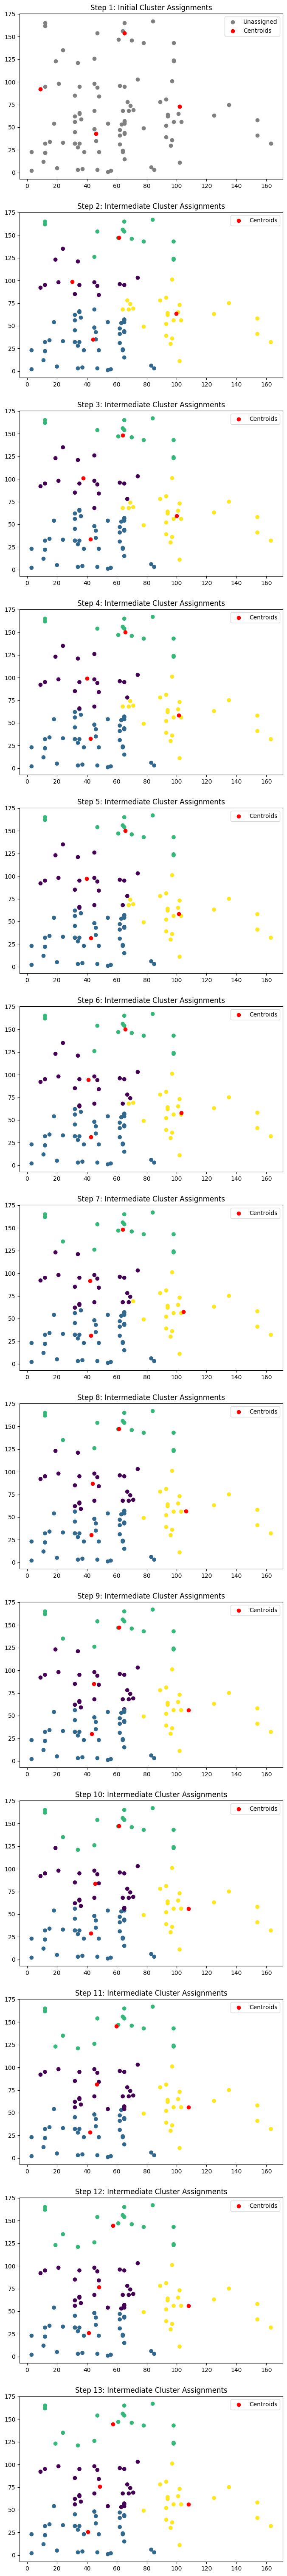

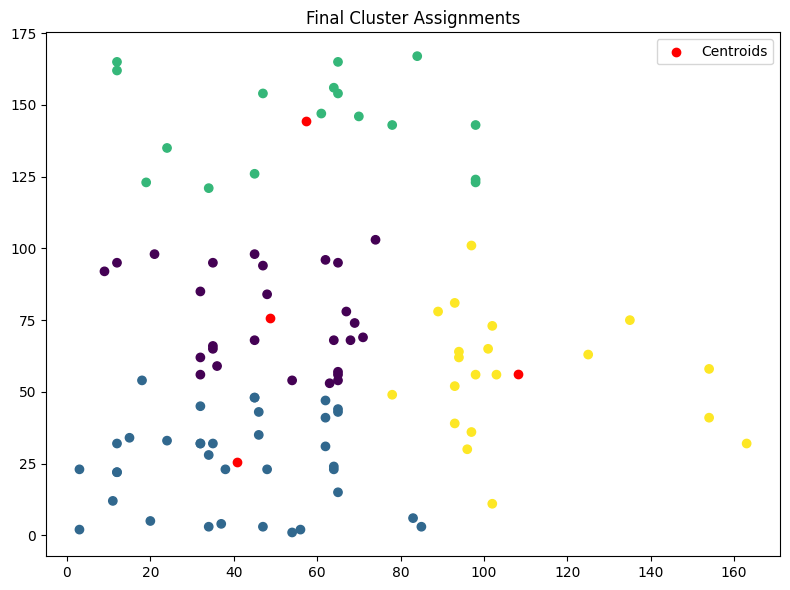

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\data\data.csv', names=['x', 'y'], skiprows=1)

# Set the number of clusters
k = 4

# Randomly initialize the centroid positions
centroids = df.sample(n=k).reset_index(drop=True)

# Initialize an empty list to store intermediate centroid positions
centroid_history = [centroids.copy()]

# Iterate until convergence or maximum iterations
max_iterations = 100
for _ in range(max_iterations):
    # Assign each data point to the cluster of its nearest centroid
    distances = np.sqrt((df['x'].values[:, np.newaxis] - centroids['x'].values) ** 2 +
                        (df['y'].values[:, np.newaxis] - centroids['y'].values) ** 2)
    labels = np.argmin(distances, axis=1)

    # Compute new centroid positions
    new_centroids = pd.concat([df.groupby(labels)['x'].mean(), df.groupby(labels)['y'].mean()], axis=1)

    # Check for convergence
    if np.allclose(new_centroids, centroids):
        break

    centroids = new_centroids.copy()
    centroid_history.append(centroids.copy())

# Plotting the intermediate steps
num_steps = len(centroid_history)

fig, axs = plt.subplots(num_steps, 1, figsize=(8, 6 * num_steps))

# Define color map
cmap = plt.cm.get_cmap('viridis', k)

# Plot initial cluster assignments
axs[0].scatter(df['x'], df['y'], c='gray', label='Unassigned')
axs[0].scatter(centroid_history[0]['x'], centroid_history[0]['y'], c='red', label='Centroids')
axs[0].set_title('Step 1: Initial Cluster Assignments')
axs[0].legend()

# Plot intermediate steps
for i in range(1, num_steps):
    distances = np.sqrt((df['x'].values[:, np.newaxis] - centroid_history[i]['x'].values) ** 2 +
                        (df['y'].values[:, np.newaxis] - centroid_history[i]['y'].values) ** 2)
    labels = np.argmin(distances, axis=1)

    axs[i].scatter(df['x'], df['y'], c=labels, cmap=cmap)
    axs[i].scatter(centroid_history[i]['x'], centroid_history[i]['y'], c='red', label='Centroids')
    axs[i].set_title(f'Step {i + 1}: Intermediate Cluster Assignments')
    axs[i].legend()

# Final cluster assignments
distances = np.sqrt((df['x'].values[:, np.newaxis] - centroids['x'].values) ** 2 +
                    (df['y'].values[:, np.newaxis] - centroids['y'].values) ** 2)
labels = np.argmin(distances, axis=1)

# Plot final cluster assignments
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['x'], df['y'], c=labels, cmap=cmap)
ax.scatter(centroids['x'], centroids['y'], c='red', label='Centroids')
ax.set_title('Final Cluster Assignments')
ax.legend()

plt.tight_layout()
plt.show()